# SC1015 DSAI Mini Project
# Exploratory Data Analysis
---

In [ ]:
#importing necessary libraries 
import numpy as np 
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
sb.set()
%matplotlib inline

In [37]:
#importing essential models and functions from sklearn 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

In [38]:
file1=pd.read_csv('survey_responses.csv')

In [40]:
# deleting columns that are unimportant to exploratory analysis
file1.drop(['Year since Matriculation', 'Q8-About How events are you aware about ?', 'response_id', 'Q9-What is an ideal student life ?'], axis='columns', inplace=True)

In [41]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Career                                                    2958 non-null   object 
 1   Citizenship                                               2958 non-null   object 
 2   Nationality                                               2958 non-null   object 
 3   Year of Study                                             2958 non-null   int64  
 4   Primary Programme                                         2958 non-null   object 
 5   Gender                                                    2958 non-null   object 
 6   Department                                                2958 non-null   object 
 7   Housing Type                                              2958 non-null   object 
 8   Q1-How many events

In [62]:
file1.describe()

,Year of Study,Q1-How many events have you Volunteered in ?,Q2-How many events have you Participated in ?,Q3-How many activities are you Interested in ?,Q4-How many activities are you Passionate about ?,Q5-What are your levels of stress ?,Q6-How Satisfied You are with your Student Life ?,Q7-How much effort do you make to interact with others ?
count,2940.000000,2940.00000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,2.209184,1.25102,1.493197,2.728231,3.189456,3.094558,1.923810,1.963265
std,1.098787,1.48243,0.959695,1.264300,1.970303,1.655793,0.562202,0.575096
min,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,1.00000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,3.000000,2.00000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000
max,5.000000,11.00000,5.000000,8.000000,11.000000,9.000000,3.000000,3.000000


In [42]:
# checking if there are any null enteries and dropping them to clean the data 
print(file1.isnull().sum())
file1=file1.dropna()
file1.reset_index(drop=True, inplace=True)
#printing this again to check if the data has been cleaned
print(file1.isnull().sum())

Career                                                       0
Citizenship                                                  0
Nationality                                                  0
Year of Study                                                0
Primary Programme                                            0
Gender                                                       0
Department                                                   0
Housing Type                                                 0
Q1-How many events have you Volunteered in ?                 0
Q2-How many events have you Participated in ?                0
Q3-How many activities are you Interested in ?               0
Q4-How many activities are you Passionate about ?            0
Q5-What are your levels of stress ?                          0
Q6-How Satisfied You are with your Student Life ?            0
Q7-How much effort do you make to interact with others ?    18
dtype: int64
Career                                    

<Axes: xlabel='Housing Type', ylabel='count'>

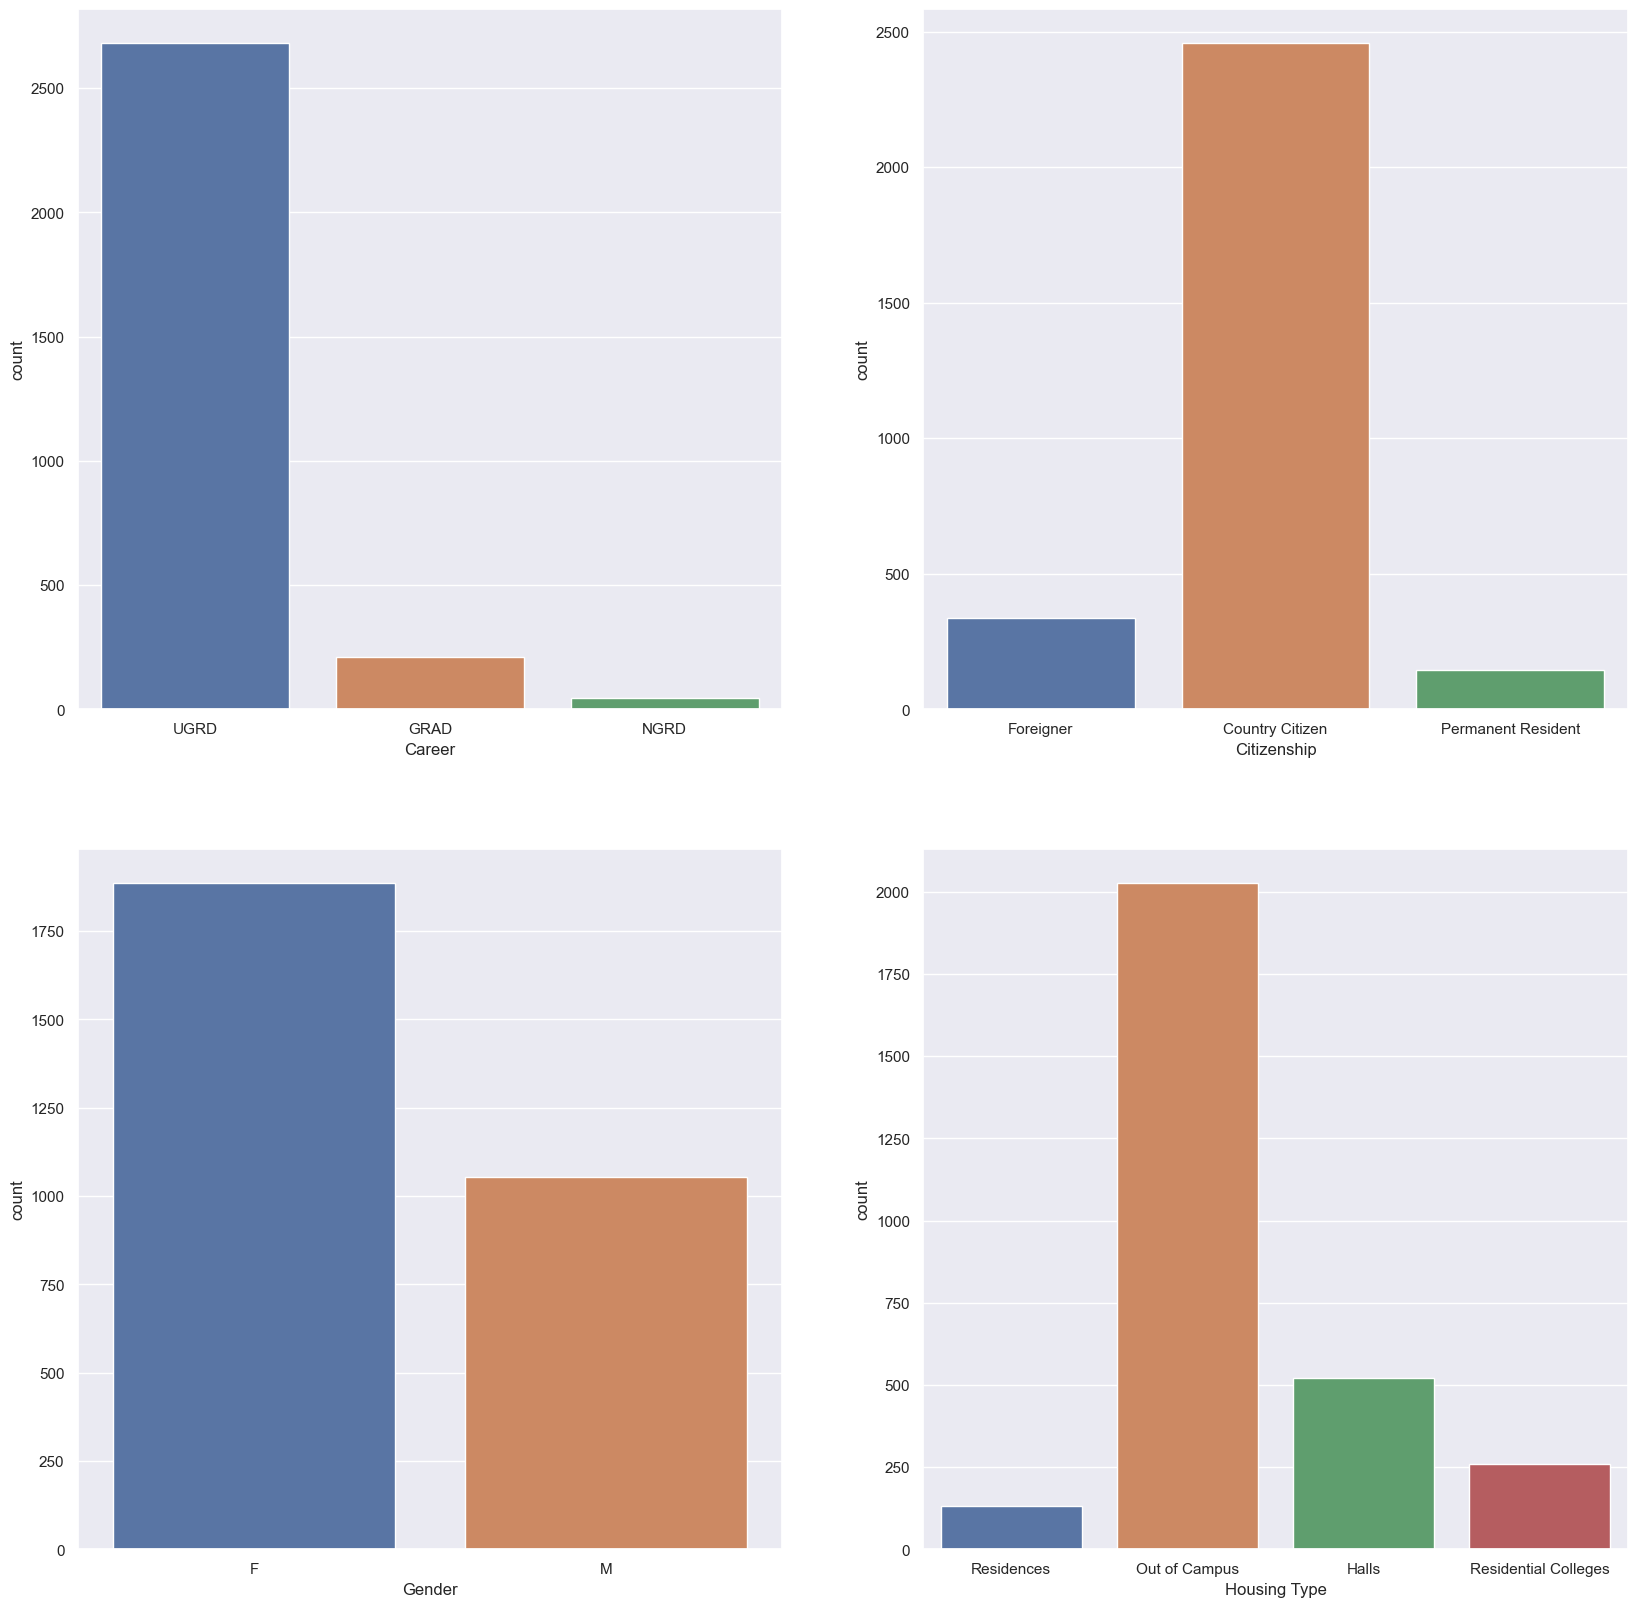

In [59]:
fig, ax = plt.subplots(2,2, figsize=(20, 20))
sb.countplot(x ='Career', data = file1, ax=ax[0,0])
sb.countplot(x ='Citizenship', data = file1, ax=ax[0,1])
sb.countplot(x ='Gender', data = file1, ax=ax[1, 0])
sb.countplot(x ='Housing Type', data = file1, ax=ax[1, 1])

<Axes: xlabel='Q5-What are your levels of stress ?', ylabel='count'>

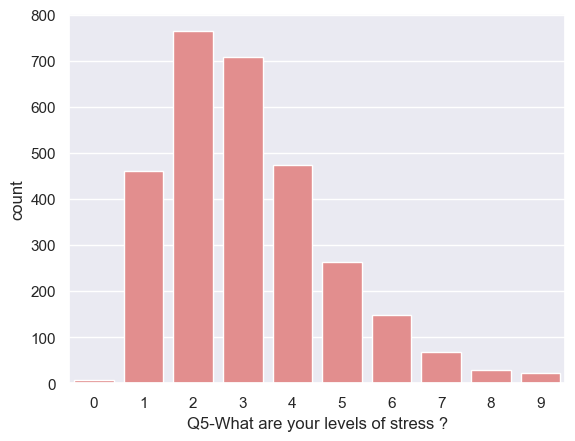

In [134]:
sb.countplot(x ='Q5-What are your levels of stress ?', data = file1, color='lightcoral')

<Axes: xlabel='Q6-How Satisfied You are with your Student Life ?', ylabel='count'>

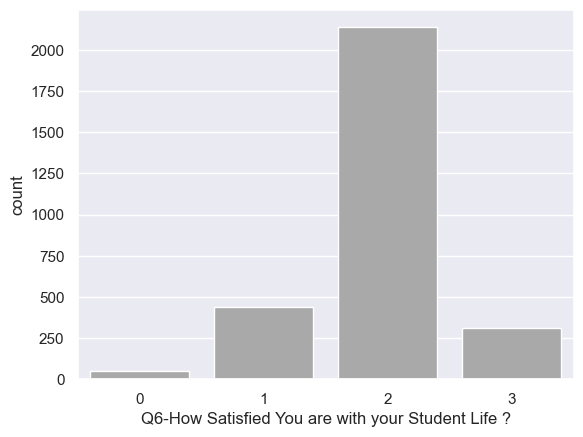

In [135]:
sb.countplot(x='Q6-How Satisfied You are with your Student Life ?', data=file1, color='darkgrey')

In [139]:
count=0;
a=0;
for x in file1['Career']: 
    if x=='UGRD':
        count=count+1
    a+=1
print("Number of undergrads : ", count)
print("Total number of students : ", a)

Number of undergrads :  2683
Total number of students :  2940


In [154]:
# Since number of undergrad students are the maximum we chose to explore the EDA particularly for undergrads 
file_ugrd = file1[file1['Career'] == 'UGRD']
file_ugrd.describe()

,Year of Study,Q1-How many events have you Volunteered in ?,Q2-How many events have you Participated in ?,Q3-How many activities are you Interested in ?,Q4-How many activities are you Passionate about ?,Q5-What are your levels of stress ?,Q6-How Satisfied You are with your Student Life ?,Q7-How much effort do you make to interact with others ?
count,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000
mean,2.250093,1.316810,1.522177,2.703317,3.221394,3.147223,1.911666,1.948192
std,1.090804,1.498783,0.952924,1.255241,1.976417,1.671229,0.562322,0.577285
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,1.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,3.000000,2.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000
max,5.000000,11.000000,5.000000,8.000000,11.000000,9.000000,3.000000,3.000000


Text(0.5, 0, 'Stess level')

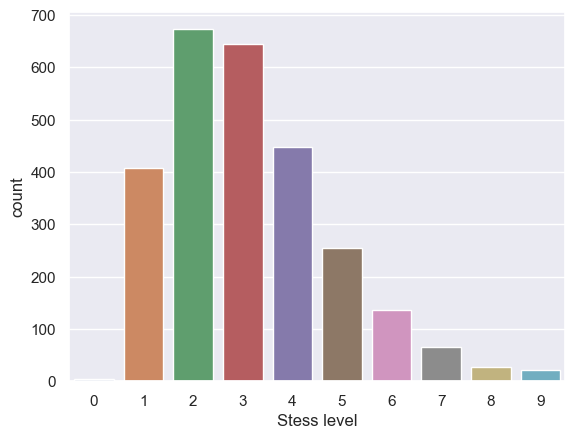

In [153]:
sb.countplot(x ='Q5-What are your levels of stress ?', data = file_ugrd)
plt.xlabel("Stess level")

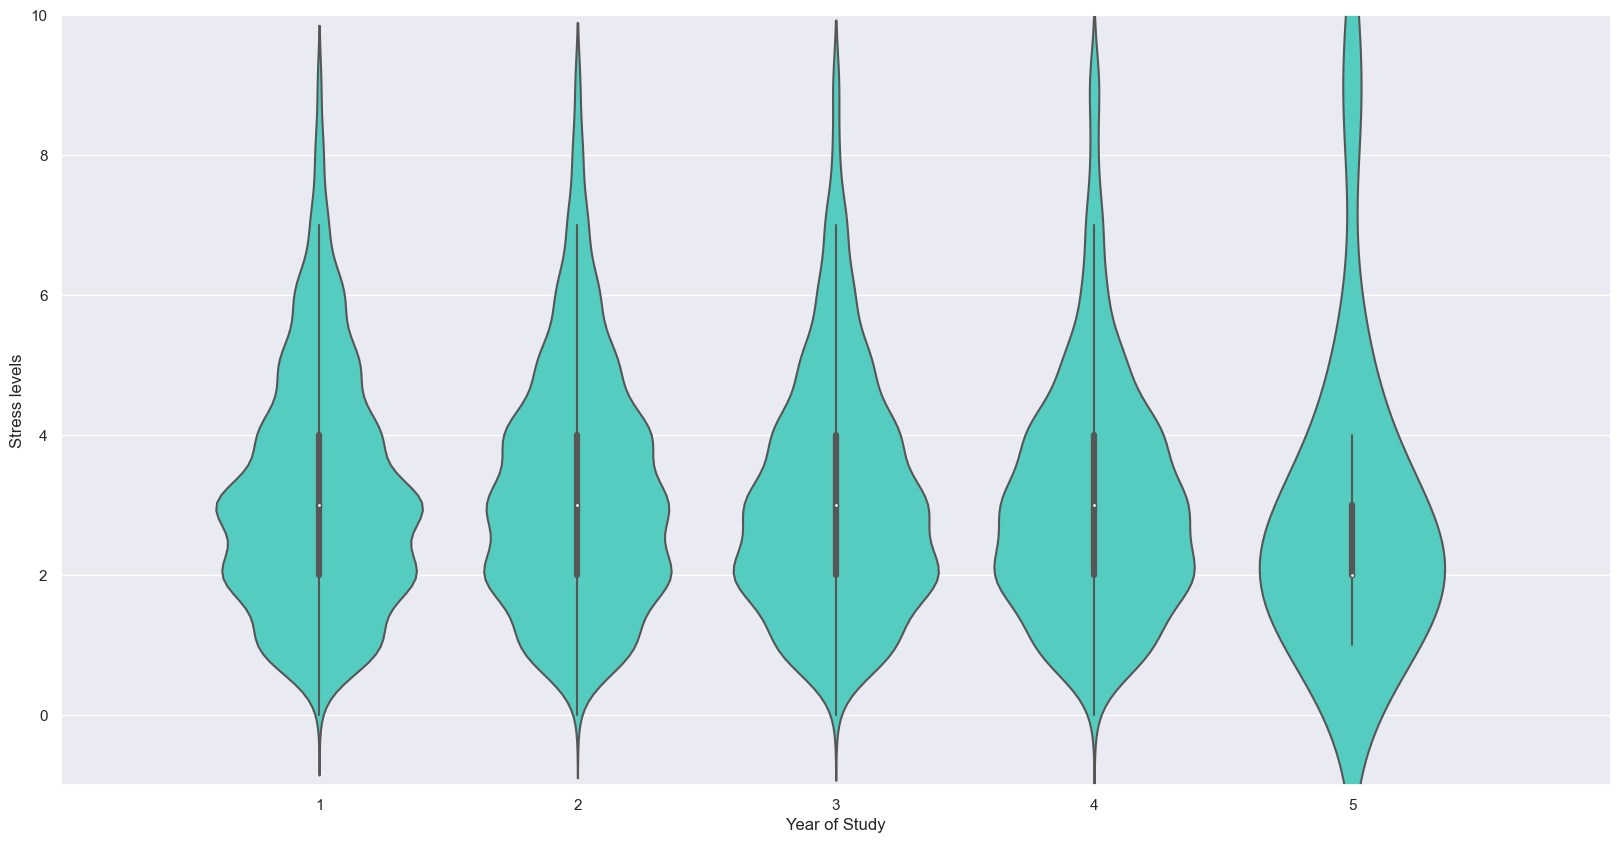

In [151]:
# we explore which year of study has the maximum amount of stress 
height=20
width=10
fig, ax= plt.subplots(figsize=(height, width))
sb.violinplot(y='Q5-What are your levels of stress ?', x='Year of Study', ax=ax, data=file_ugrd, color='turquoise')
ax.set_xlim(-1,5)
ax.set_ylim(-1,10)
plt.xlabel('Year of Study')
plt.ylabel('Stress levels')
plt.show()

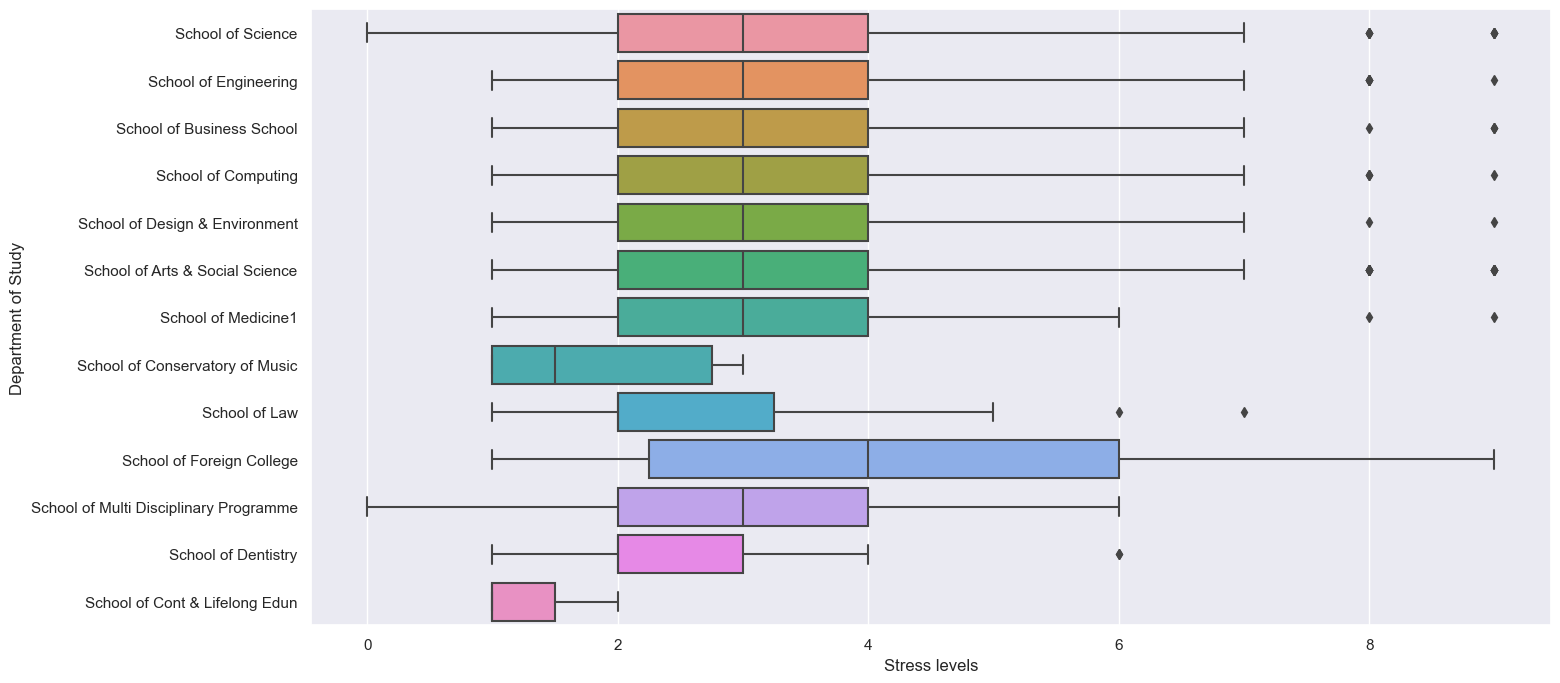

In [148]:
height=16
width=8
fig, ax= plt.subplots(figsize=(height, width))
sb.boxplot(x='Q5-What are your levels of stress ?', y='Department', ax=ax, data=file_ugrd)
plt.xlabel('Stress levels')
plt.ylabel('Department of Study')
plt.show()